# Introduction

This notebook will demonstrate on how to use python (thru google colab) in the implementation of stiffness method for axial springs.

Python is a programming language that can be run thru a platform called google colab. What nice about this is it has a lot of 'modules' or 'packages' that are freely available. Since stiffness method requires a lot of matrix operations, python is a great platform or tool to illustrate the steps for this method.

In Python, you can import or use 'add-ons' onto your code in order for you to use functions that will make your code easier.

In this course, I will only introduce the necessary functions that will be helpful to implement some of the operations in the analysis procedure. If you want to get started with python you can watch: [Python for everybody](https://youtu.be/8DvywoWv6fI?si=F0ROKZ484B688yU-).

The most commonly used modules in python to perform numerical analysis is `numpy` [see numpy online documentation](https://numpy.org/doc/stable/).

```
import numpy as np
```
The line imports the numpy module and uses the alias  `np`. This means that whenever you want to use a function in the numpy module it should start with `np.`

In [ ]:
import numpy as np

# Problem statement

This python notebook will demonstrate the steps on how to perform stiffness method to an idealized structure composed of axial springs.

The idealized structure is composed of two axial springs with an external force applied at one end and supported at the other end (see figure below).

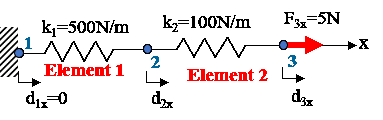

## **STEP 1**: Discretize and element type selection

The first step is to discretize the entire structure into smaller finite elements. This step basically involves the process of defining: (a) elements (b) nodes and (c) how the elements are connected to the nodes.

The definition of nodes and elements is shown graphically in the figure. For a more complicated structure (in which we will be dealing on at the later part of the course), the location of the nodes in space (e.g. its coordinates) should be defined explicitly which is essential in calculating the 'stiffness' of the element. Since the stiffness of the element are given (i.e. $k_1 = 500$ and $k_2=100$), the coordinates or position of the nodes are not needed.

The next important thing to define in the discretization process is the connectivity of nodes that defines the elements. This is called element *connectivity table*. Based on the figure, the connectivity table is given as

|Elements|Node i| Node j|
|--------|------|-------|
|1       |1     |2      |
|2       |2     |3      |

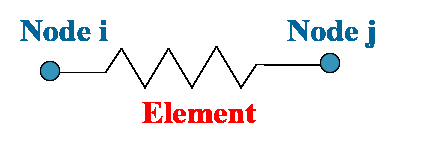


In python, the index of a matrix starts with 0. Thus, the connectivity table defined above should be changed to follow the python indexing rule.

Python indexing

|Elements|Node i| Node j|
|--------|------|-------|
|0       |0     |1      |
|1       |1     |2      |

In order to define this table or matrix in python, `numpy.array` or `np.array` object is defined. The array object is used because it has properties that closely resembles that of a matrix.

```
elems = np.array([[0,1],
                  [1,2]])
```

Here you can see `np.array( )` takes in the input argument `[[0,1], [1,2]]` which is the second and third column of the table defined above. Basically the brackets in `[ ]` in python defines a `list`. Therefore the input argument `[[0,1], [1,2]]` is a list of a list with each row (e.g. `[0,1]` and `[1,2]`) as the rows of the matrix.

The matrix or in python languange, the numpy array, is then assigned to the variable with handle name `elems` thru the operator `=`.

Take note that the the first column of the table is the `index` of each row. What it means is that, you can recall or get the nodes connected to that element by indexing the matrix. For example, the `Element 1` or its equivalent in python is `Element 0` can be recalled as
```
elems[0]
```
You can show the connected nodes by using the line
```
print(f'Element 0 is connected to nodes {elems[0]}.')
```


In [ ]:
elems = np.array([[0,1],
                  [1,2]])
print(f'Element 0 is connected to nodes {elems[0]}.')

Element 0 is connected to nodes [0 1].


**Test your understanding:** Show the nodes connected to the second element.

## **STEP 2**: Describe element behavior

The second step is to to define the 'behavior' of the element. The element considered here is an axial spring which can deform along the x-axis as illustrated in the figure above. The behavior that we intend to describe here is the force-displacemet relations for the element. That is,
$$\{ f\} = [k]\{u\}$$
where $\{f\}$ is the element force vector, $\{u\}$ is the element displacement vector and $[k]$ is the element stiffness matrix. Take note that these quantities are defined in the local coordinates system.

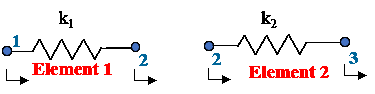

For element 1 ($k_1=500$),

$$
\left\{
\begin{matrix}
f_{1x}^1 \\
f_{2x}^1
\end{matrix}
\right\}
=
\begin{bmatrix}
k_1 & -k_1 \\
-k_1 & k_1
\end{bmatrix}
\cdot
\left\{
\begin{matrix}
u_{1x}^1 \\
u_{2x}^1
\end{matrix}
\right\}
$$


for element 2 ($k_2=100$),
$$
\left\{
\begin{matrix}
f_{1x}^2 \\
f_{2x}^2
\end{matrix}
\right\}
=
\begin{bmatrix}
k_2 & -k_2 \\
-k_2 & k_2
\end{bmatrix}
\cdot
\left\{
\begin{matrix}
u_{1x}^2 \\
u_{2x}^2
\end{matrix}
\right\}
$$

The element stiffness matrix can be defined using the lines below.

The matrices `k_e1` and `k_e2` corresponds to the element stiffness matrix of each element.

In [ ]:
k1 = 500
k2 = 100

# element stiffness matrix of spring no. 1
k_e1 = np.array([[ k1,-k1],
                 [-k1, k1]] )

# element stiffness matrix of spring no. 2
k_e2 = np.array([[ k2,-k2],
                 [-k2, k2]] )

## **STEP 3**: Describe global structure behavior

The global force-displacement relation of the structure is given by
$$\{f\}=[K_g]\{u\}$$

As shown in the figure above, each node has one degree of freedom (displacements needed at each node). This is a simplefied structure with axial springs and one DOF per node is enough to define the displacement of the element. NOTE: this might not be the case for more complicated structure.

We first define a global stiffness matrix $K_g$. The size of this global stiffness matrix is equal to the numboer of DOF (`n_dof`) which is equal to three for this structure.

The numpy function `np.zeros( )` which creates a matrix or a numpy array with dimension as the input arguement. For this case it creates $3\times 3$ matrix with all zeros as its initial value.

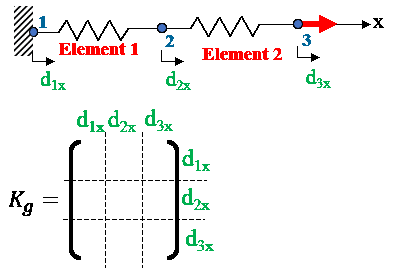

In [ ]:
n_dof = 3
K_g = np.zeros((n_dof,n_dof) )

The next step is to update the global stiffness matrix by adding the element stiffness matrix to the corresponding index or degree of freedom.

We start with first element, $k_{e1}$, `el_i = 0` (note in python indexing starts with `0`).

Then, we get the corresponding nodes that are connected to that element from the element connectivity table. You can get the nodes connected to the element using the command `elems[0,:]`. This command gets the first row of the matrix `elems` or alternatively we can use `elems[el_i,:]`.

**NOTE**: Each column and row of the stiffness matrix corresponds to a DOF (i.e., $d_{1x}, d_{2x},d_{3x}$ in the figure above) and not the node. But, the node-element connectivity table defines the connected nodes of an element.

Therefore, we need to convert or know the appropriate DOF per node. Since this is an axial spring problem, there is only one DOF per node. This means that the corresponding node will also be the DOF number such that
```
eldofs = np.array([elnodes[0],elnodes[1]])
```
This is not always the case, especially if there is more than one DOF per node.

The next step is to 'add' or 'update' the global stiffness matrix by adding the element stiffness matrix on the corresponding index or location. See figure below for the illustration

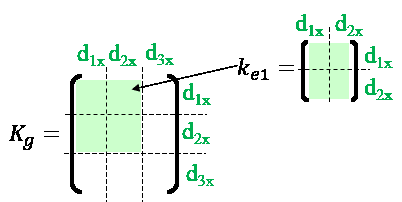

The process illustrated above is implemented in the code:
```
K_g[np.ix_(eldofs,eldofs) ] = K_g[np.ix_(eldofs,eldofs) ] + k_e1
```
This uses the numpy function `np.ix_( )` which basically gets the components of the matrix with the index as its input arguments. For this case the input arguments are `eldofs` or `[0,1]`.

In [ ]:
el_i = 0
elnodes = elems[el_i,:]
eldofs = np.array([elnodes[0],elnodes[1]])
print(f'The corresponding indices or element dofs element 01 are: {eldofs}\n')
K_g[np.ix_(eldofs,eldofs) ] = K_g[np.ix_(eldofs,eldofs) ] + k_e1
print(f'The updated Global Stiffness matrix is: \n{K_g}\n')

The corresponding indices or element dofs element 01 are: [0 1]

The updated Global Stiffness matrix is: 
[[ 500. -500.    0.]
 [-500.  500.    0.]
 [   0.    0.    0.]]



The same procedure can be done by just changing `el_i = 1` to correspond for the second element. The process is illustrated in the figure below.

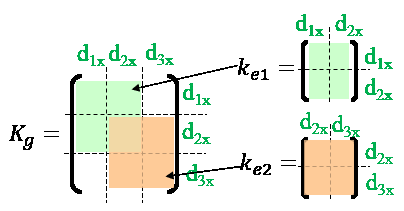

In [ ]:
el_i = 1
elnodes = elems[el_i,:]
eldofs = np.array([elnodes[0],elnodes[1]])
print(f'The corresponding indices or element dofs element 02 are: {eldofs}\n')
K_g[np.ix_(eldofs,eldofs) ] = K_g[np.ix_(eldofs,eldofs) ] + k_e2
print(f'The updated Global Stiffness matrix is: \n{K_g}\n')

The corresponding indices or element dofs element 02 are: [1 2]

The updated Global Stiffness matrix is: 
[[ 500. -500.    0.]
 [-500.  600. -100.]
 [   0. -100.  100.]]



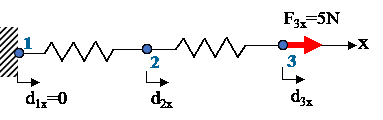

The next step in describing the global stiffness behavior is defining the force and displacement vectors or column matrices. We initialize this by making a column matrix with number of rows equal to `n_dof` or total number of DOF.

In [ ]:
f = np.zeros([n_dof,1])
u = np.zeros([n_dof,1])

As can be seen in the figure above, the force $F_{3x}=5N$ is applied to the 3rd DOF or in python indexing notation `f[2]=5`.

In [ ]:
f[2] = 5
print(f'The force vector is:\n {f}\n')

The force vector is:
 [[0.]
 [0.]
 [5.]]



The next step is to define the DOF which are specified (e.g. supports) and that are free. Based on the figure above, DOF 1 is fixed or have `0` displacement therefore it is a specified DOF. On other hand, DOF 2 and 3 are free DOF (or unknown DOFs).

In [ ]:
dofspec = [0]     # specied DOF
doffree = [1,2]   # free DOF
print(f'The specified dofs are: \n{dofspec}\n')
print(f'The free dofs are: \n{doffree}\n')

The specified dofs are: 
[0]

The free dofs are: 
[1, 2]



## **STEP 4**: Impose boundary conditions and solve for the uknowns
The boundary conditions are the specified DOFs (also called essential BC). It is used or imposed by using partitioning of the global stiffness matrix.

The next step is to partition the global stiffness matrix by separating the free and specified DOFs. Using some matrix manipulations as shown below, the unknown DOF or the free DOFs can be calculated.

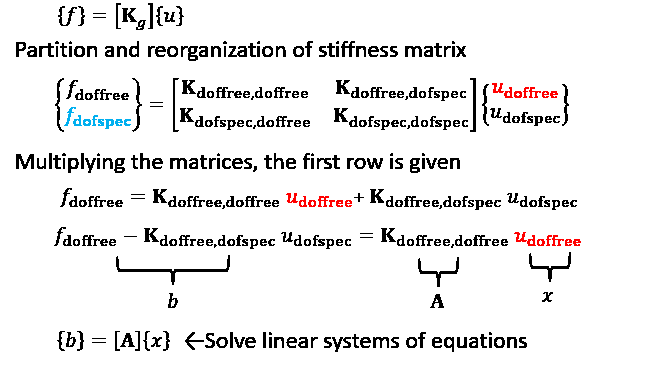

In [ ]:
A = K_g[np.ix_(doffree,doffree)]
b = f[np.ix_(doffree)] - np.dot(K_g[np.ix_(doffree,dofspec)],u[np.ix_(dofspec)])
u[np.ix_(doffree)] = np.linalg.solve(A,b);

print(f'The nodal displacements: \n{u}\n')

The nodal displacements: 
[[0.  ]
 [0.01]
 [0.06]]



Finally the reactions or the forces on the specified DOF can be calculated using the results above.

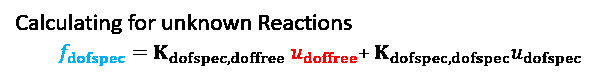

In [ ]:
f[np.ix_(dofspec)] = np.dot(K_g[np.ix_(dofspec,doffree)],u[np.ix_(doffree)] ) + np.dot(K_g[np.ix_(dofspec,dofspec)],u[np.ix_(dofspec)] )

print(f'The reactions are: \n{f[np.ix_(dofspec)]}\n')

The reactions are: 
[[-5.]]

